<a href="https://colab.research.google.com/github/NataliaValero/An-lisis-cuantitativo-de-acciones/blob/main/Analisis_cuantitativo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Análisis cuantitativo de acciones**

El mecardo bursátil está abierto a muchas oportunidades, es por esta razón que los inversionistas van a la bolsa de valores en busca de obtener rentabilidades mediante la compra de acciones. Comprar una accion significa depositar confianza en las actividades y decisiones que una empresa proyecta a futuro.

Para entender el funcionamiento de una empresa es importante realizar un estudio financiero que nos permita identificar patrones antes de tomar una decisión de compra o venta. Este proceso se conoce como analisis cuantitativo y consiste en una serie de tecnicas y procedimientos matematicos y estadisticos que permiten analizar la informacion financiera para obtener una vision objetiva acerca de la situacion actual de una empresa y que proyecciones pueden tener a futuro.

En este notebook vamos a realizar un análisis cuantitativo básico con datos extraídos de la página de Yahoo Finance mediante la API (yfinance) para las acciones de Meta, Google y Twitter.

Este analisis estara dividido en tres partes:

**1. Tendencia de precios:** Identificar la tendencia del precio de las acciones a través de periodos de tiempo (1 año y 10 años).

**2. Indicadores relacionados con acciones:** Price to book, Price to ratio y relación Cash VS debt.
 
**3. Income statement:** Realizar una evaluacion del estado de resultados (Total Revenue, el Gross profit, Operating Income Revenue y el net income) para evaluar el desempeño financiero de las empresas.

**4. Indicadores de rentabilidad:** Calcular el margen bruto, margen operacional y margen neto.

In [5]:
# instalar yfinance

pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# Importar librerias

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Configurar los plots
#plt.style.use('classic')
plt.style.use('classic')


#**2. Tendencia de precios**

Vamos a revisar los precios en diferentes periodos de tiempo, primero veamos los precios de hace 1 año y vamos a ver en un gráfico la línea de tendencia del precio de cierre con intervalo diario.

In [7]:
# Lista de stocks

tickers = yf.Tickers('META GOOG TWTR')

#**3. Datos históricos: Período 1 año**

Para obtener los precios históricos utilizamos el método de historial que ofrece la API y pasamos el periodo a analizar y el intervalo en el que queremos los datos como parámetro, en este caso intervalo diario.

[*********************100%***********************]  3 of 3 completed
              GOOG    META   TWTR
Date                             
2022-07-05  113.89  168.19  38.38
2022-07-06  115.21  169.77  38.21
2022-07-07  119.31  172.19  38.79
2022-07-08  120.17  170.88  36.81
2022-07-11  116.52  162.88  32.65
2022-07-12  114.85  163.27  34.06
2022-07-13  112.19  163.49  36.75
2022-07-14  111.44  158.05  36.29
2022-07-15  112.77  164.70  37.74
2022-07-18     NaN  167.23  38.41 

             GOOG        META        TWTR
count  251.000000  252.000000  252.000000
mean   133.638207  276.699405   48.026548
std     12.178232   75.101410   11.597406
min    105.840000  155.850000   32.420000
25%    127.265000  201.677500   38.090000
50%    137.040000  316.740000   44.475000
75%    142.805000  340.807500   61.325000
max    150.710000  382.180000   71.690000 



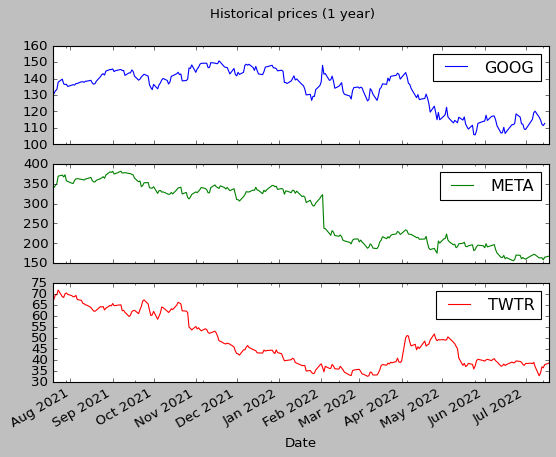

In [129]:
# descargamos el precio de cierre para las tres acciones de 1 año
data_1_anio = tickers.history( period = '1y', interval = '1d', rounding = True)['Close']
print(data_1_anio.tail(10),'\n')

# Resumen de los datos
print(data_1_anio.describe(),'\n')

# visualizacion del precio
data_1_anio.plot(kind = 'line', title ='Historical prices (1 year)',subplots= True)

# mostrar el plot
plt.show()

#**4. Datos históricos: Período 10 años**

Ya sabemos ahora que el valor máximo del precio de las tres acciones se produce en el año 2021, siendo el de mayor coste la acción de GOOG. Querremos ver la tendencia del precio pero por un período de 10 años.



[*********************100%***********************]  3 of 3 completed
              GOOG         META         TWTR
count  2091.000000  2515.000000  2187.000000
mean     62.220521   150.440636    35.742812
std      34.302947    88.160106    14.222269
min      24.560000    17.730000    14.010000
25%      36.800000    77.915000    25.005000
50%      53.620000   147.700000    34.860000
75%      73.225000   194.595000    44.015000
max     150.710000   382.180000    77.630000 



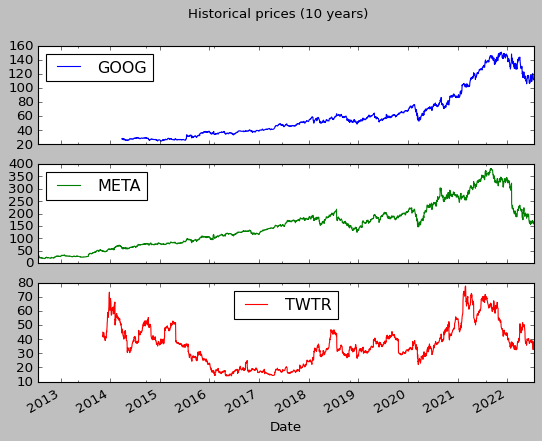

In [9]:
# descargamos el precio de cierre para las tres acciones de 10 años
data_10_anios = tickers.history( period = '10y', interval = '1d', rounding = True)['Close']

# Resumen de los datos
print(data_10_anios.describe(),'\n')

# visualización del precio
data_10_anios.plot(kind = 'line', title = 'Historical prices (10 years)', subplots= True)
# mostrar el plot
plt.show()

# **5. Indicadores relacionados con acciones**

Los indicadores son medidas de valoración de una empresa. En esta sección vamos a extraer la relación PE, Price to Book y la relación caja vs deuda. Estas estadísticas pueden ser útiles para determinar qué tan sobrevaluada o subvaluada está la empresa. También queremos saber si tienes más efectivo que deuda y para ello debemos tener los datos de la capitalización bursátil y el Valor de la empresa.

Para obtener algunos datos estadísticos podemos usar el método info usando la sintaxis de **yf.Ticker(stock).info**, con esta información podremos extraer algunos indicadores e información general de la empresa.

In [10]:
# Lista de tickets
stocks = ['GOOG', 'META', 'TWTR']

# Info por ticket
info = []
for stock in stocks:
    info.append(yf.Ticker(stock).info)

In [11]:
# Pasar los datos de info a un dataframe 
indicadores_df = pd.DataFrame(info).set_index('symbol').reset_index()


#**6. Extraiga la relación PE, el precio contable, la capitalización de mercado y el valor empresarial**

Ya hemos formado un dataframe con toda la información por acción, ahora solo vamos a extraer los datos que necesitamos con un filtro indicando las columnas de los indicadores.

In [14]:
# Obtenemos los indicadores 
indicadores_df = indicadores_df[['symbol','trailingPE', 'priceToBook','marketCap','enterpriseValue']]
indicadores_df

,symbol,trailingPE,priceToBook,marketCap,enterpriseValue
0,GOOG,19.661896,5.335955,1440854179840,1379773054976
1,META,12.583145,3.683075,452577853440,416499466240
2,TWTR,147.730770,4.958048,29352192000,29152352256


#**7. Relación de efectivo vs. deuda**

Teniendo unos indicadores que se pueden obtener directamente de la información que ofrece la API, vamos a ver si la empresa tiene más liquidez que deuda, para ello restamos el valor de la empresa a la capitalización bursátil. Si la capitalización de mercado es mayor que el valor de la empresa, significa que hay más efectivo que deuda.



In [13]:
# Agregar la columna cash vs debt
indicadores_df['Cash vs Debt'] = indicadores_df['marketCap'].subtract(indicadores_df['enterpriseValue'])
indicadores_df

,symbol,trailingPE,priceToBook,marketCap,enterpriseValue,Cash vs Debt
0,GOOG,19.661896,5.335955,1440854179840,1379773054976,61081124864
1,META,12.583145,3.683075,452577853440,416499466240,36078387200
2,TWTR,147.730770,4.958048,29352192000,29152352256,199839744


Una vez extraídos los indicadores podremos tener una impresión de la sobrevaloración o infravaloración de la acción. Podemos ver el caso particular donde Twitter tiene un PE exagerado respecto a su competencia, es decir, está sobrevalorado y es la acción que menos efectivo tiene. Goog y Meta, por otro lado, muestran indicadores saludables, están dentro del promedio y podrían requerir ser infravalorados por tener una relación PE más baja, especialmente las acciones de Meta.

#**8. Obtener el Estado de Resultados por acción seleccionada por medio de interacción con el usuario**
 
También es muy importante revisar las finanzas de la empresa, ver su estado de resultados y entender más de la operativa del negocio. Para obtener el income statement podemos usar el método ***financials***, para este caso vamos a extraer datos anuales.



In [128]:
#creamos una función para obtener los datos que necesitamos del income statement
def get_income_statement(ticker):
    datos= ['Total Revenue',  'Gross Profit','Operating Income', 'Net Income']
    financials = yf.Ticker(ticker).financials.T
    income_df = financials[datos].rename_axis('Date')
    return income_df

In [119]:
# Diccionario que contendra los income statement de las acciones
dictionary_income = {}
for stock in stocks:
    dictionary_income[stock] = get_income_statement(stock)

In [125]:
# Para obtener el income de un stock debemos colocar el ticket de interés

stock_seleccionado = input('Ingrese stock de interés, las opciones son ' + str(stocks[:])+' = ')
income_stock  = dictionary_income[stock_seleccionado]


income_stock

Ingrese stock de interes, las opciones son ['GOOG', 'META', 'TWTR'] = GOOG


,Total Revenue,Gross Profit,Operating Income,Net Income
Date,,,,
2021-12-31,257637000000.0,146698000000.0,78714000000.0,76033000000.0
2020-12-31,182527000000.0,97795000000.0,41224000000.0,40269000000.0
2019-12-31,161857000000.0,89961000000.0,35928000000.0,34343000000.0
2018-12-31,136819000000.0,77270000000.0,32595000000.0,30736000000.0


#**9. Indicadores de Rentabilidad**

Vamos a calcular el margen bruto, margen operacional y margen neto. Estos indicadores de rentabilidad nos permiten calcular las utilidades en las diferentes etapas del estado de resultados. Lo vamos a calcular usando el dataframe por stock.

In [127]:
# income del stock de ticket selecionado con indicadores de rentabilidad
indicadores_rent= income_stock.copy()
indicadores_rent['% Margen Bruto'] = indicadores_rent['Gross Profit'].div(indicadores_rent['Total Revenue'])*100
indicadores_rent['% Margen Operacional'] = indicadores_rent['Operating Income'].div(indicadores_rent['Total Revenue'])*100
indicadores_rent['% Margen Neto'] = indicadores_rent['Net Income'].div(indicadores_rent['Total Revenue'])*100
indicadores_rent

,Total Revenue,Gross Profit,Operating Income,Net Income,% Margen Bruto,% Margen Operacional,% Margen Neto
Date,,,,,,,
2021-12-31,257637000000.0,146698000000.0,78714000000.0,76033000000.0,56.939803,30.552289,29.511677
2020-12-31,182527000000.0,97795000000.0,41224000000.0,40269000000.0,53.578375,22.585152,22.061942
2019-12-31,161857000000.0,89961000000.0,35928000000.0,34343000000.0,55.580543,22.197372,21.218112
2018-12-31,136819000000.0,77270000000.0,32595000000.0,30736000000.0,56.476074,23.823446,22.464716


#**10. Conclusión**
 
Meta es la acción que muestra los mejores indicadores, tanto en términos de rentabilidad como de valoración, es una acción infravalorada, es decir, está barata en este momento. Google también es una empresa que muestra finanzas saludables con un precio asequible debido a la división de julio de 2022. Por el contrario, Twitter ha mostrado pérdidas, está infravalorado y la bolsa no ha mostrado un crecimiento apreciable.
 
Hacer uso de los indicadores financieros y la información pública de las empresas cotizadas es muy importante antes de tomar una decisión de inversión, ya que nos permite evaluar diferentes escenarios en los que podemos descubrir qué tan eficiente es una empresa.
 
